<a href="https://colab.research.google.com/github/baromas/Abortion-laws-correlation/blob/main/corr_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Общая информация

Тип корреляции - точечно-бисериальный коэффициент корреляции (специальный случай корреляции Пирсона, где одна из переменных является бинарной)

Параметры, выбранные для анализа:

Младенческая смертность (Infant mortality) -  – это смерть младенца до достижения им первого дня рождения. Уровень младенческой смертности в популяции можно описать коэффициентом младенческой смертности ( IMR ), который представляет собой количество смертей младенцев в возрасте до одного года на 1000 живорождений. Аналогичным образом, уровень детской смертности , также известный как уровень смертности детей в возрасте до пяти лет, сравнивает уровень смертности детей в возрасте до пяти лет.

Фертильность (Fertility) - это способность зачать ребенка. Коэффициент рождаемости представляет собой среднее число детей, рожденных в течение жизни человека, и определяется количественно демографически.

Материнская смертность (Maternal mortality) - это число женщин, умирающих от причин, связанных с беременностью, во время беременности или в течение 42 дней после прерывания беременности, на 100 000 живорождений

Типы графиков:

1) Диаграммы размаха («ящик с усами») (Box and Whisker Plot или Box Plot) – это удобный способ визуального представления групп числовых данных через квартили.

Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами. Диаграммы размаха могут располагаться как горизонтально, так и вертикально.

2) Ленточная диаграмма — это одноосная диаграмма рассеяния , которая используется для визуализации распределения множества отдельных одномерных значений. Значения отображаются в виде точек вдоль одной уникальной оси, при этом точки с одним и тем же значением могут перекрываться.

Чтобы отобразить перекрывающиеся значения, можно изменить непрозрачность или цвет точек или вместо этого использовать график дрожания или график подсчетов . Обычно несколько полосовых графиков размещаются рядом для сравнения распределения точек данных между несколькими значениями, категориями или диапазонами.

3) Точечный график представляет собой оценку центральной тенденции числовой переменной по положению точки и дает некоторое представление о неопределенности этой оценки с помощью шкалы ошибок.

Точечные графики могут быть более полезны, чем гистограммы, для фокусирования сравнений между разными уровнями одной или нескольких категориальных переменных. Они особенно искусны в демонстрации взаимодействий: как взаимосвязь между уровнями одной категориальной переменной меняется на разных уровнях второй категориальной переменной. Линии, соединяющие каждую точку с одного уровня, позволяют судить о взаимодействии по разнице в наклоне, что проще для глаз, чем сравнение высот нескольких групп точек или полос.

# Влияние абортов на детскую смертность, фертильность и материнскую смертность

# Датафреймы и препроцессинг

In [ ]:
df_germ = pd.read_csv("germany.csv")
df_germ

,Year,Status,Infant_Mortality,Fertility,Maternal_Mortality
0,1982,0,11.960,1.473,13.7
1,1983,0,11.070,1.464,12.3
2,1984,0,10.511,1.457,11.4
3,1985,0,9.952,1.450,10.3
4,1986,0,9.394,1.444,10.7
5,1987,0,8.835,1.437,9.0
6,1988,0,8.276,1.430,9.4
7,1989,0,7.818,1.404,9.1
8,1990,0,7.361,1.378,8.7
9,1991,0,6.903,1.353,8.9


In [ ]:
df_swi = pd.read_csv("switzerland.csv")
df_swi

,Year,Status,Infant_Mortality,Fertility,Maternal_Mortality
0,1992,0,6.255,1.541,10.0
1,1993,0,6.062,1.539,9.6
2,1994,0,5.805,1.528,9.8
3,1995,0,5.548,1.517,9.4
4,1996,0,5.290,1.506,9.0
5,1997,0,5.033,1.495,8.8
6,1998,0,4.766,1.484,8.4
7,1999,0,4.732,1.469,8.1
8,2000,0,4.687,1.454,8.0
9,2001,0,4.643,1.438,9.0


In [ ]:
df_turk = pd.read_csv("turkey.csv")
df_turk

,Year,Status,Infant_Mortality,Fertility,Maternal_Mortality
0,1973,0,144.947,5.393,74.3
1,1974,0,139.972,5.253,74.0
2,1975,0,134.996,5.114,70.7
3,1976,0,130.021,4.974,68.9
4,1977,0,125.045,4.835,67.1
5,1978,0,120.070,4.695,66.0
6,1979,0,115.042,4.578,64.3
7,1980,0,110.014,4.461,63.0
8,1981,0,104.987,4.345,60.2
9,1982,0,99.959,4.228,58.7


In [ ]:
df_russ = pd.read_csv("russia.csv")
df_russ

,Year,Status,Infant_Mortality,Fertility,Maternal_Mortality
0,1945,0,130.097,3.630,643.8
1,1946,0,123.202,3.395,620.7
2,1947,0,120.247,3.432,461.5
3,1948,0,117.582,3.101,441.3
4,1949,0,120.894,2.986,431.5
5,1950,0,125.093,2.868,399.0
6,1951,0,116.879,2.862,372.0
7,1952,0,108.664,2.856,339.0
8,1953,0,100.449,2.850,300.0
9,1954,0,92.234,2.844,288.9


# Германия

## Корреляция

In [ ]:
fert_corr_germ = pointbiserialr(df_germ['Status'], df_germ['Fertility'])
print(f"Корреляция между абортами и фертильностью: {fert_corr_germ[0]}")
inf_mort_germ = pointbiserialr(df_germ['Status'], df_germ['Infant_Mortality'])
print(f"Корреляция между абортами и детской смертностью: {inf_mort_germ[0]}")
mat_mort_germ = pointbiserialr(df_germ['Status'], df_germ['Maternal_Mortality'])
print(f"Корреляция между абортами и материнской смертностью: {mat_mort_germ[0]}")

Корреляция между абортами и фертильностью: -0.8625747273017229
Корреляция между абортами и детской смертностью: -0.8619877225898539
Корреляция между абортами и материнской смертностью: -0.7608984838089696


## Графики

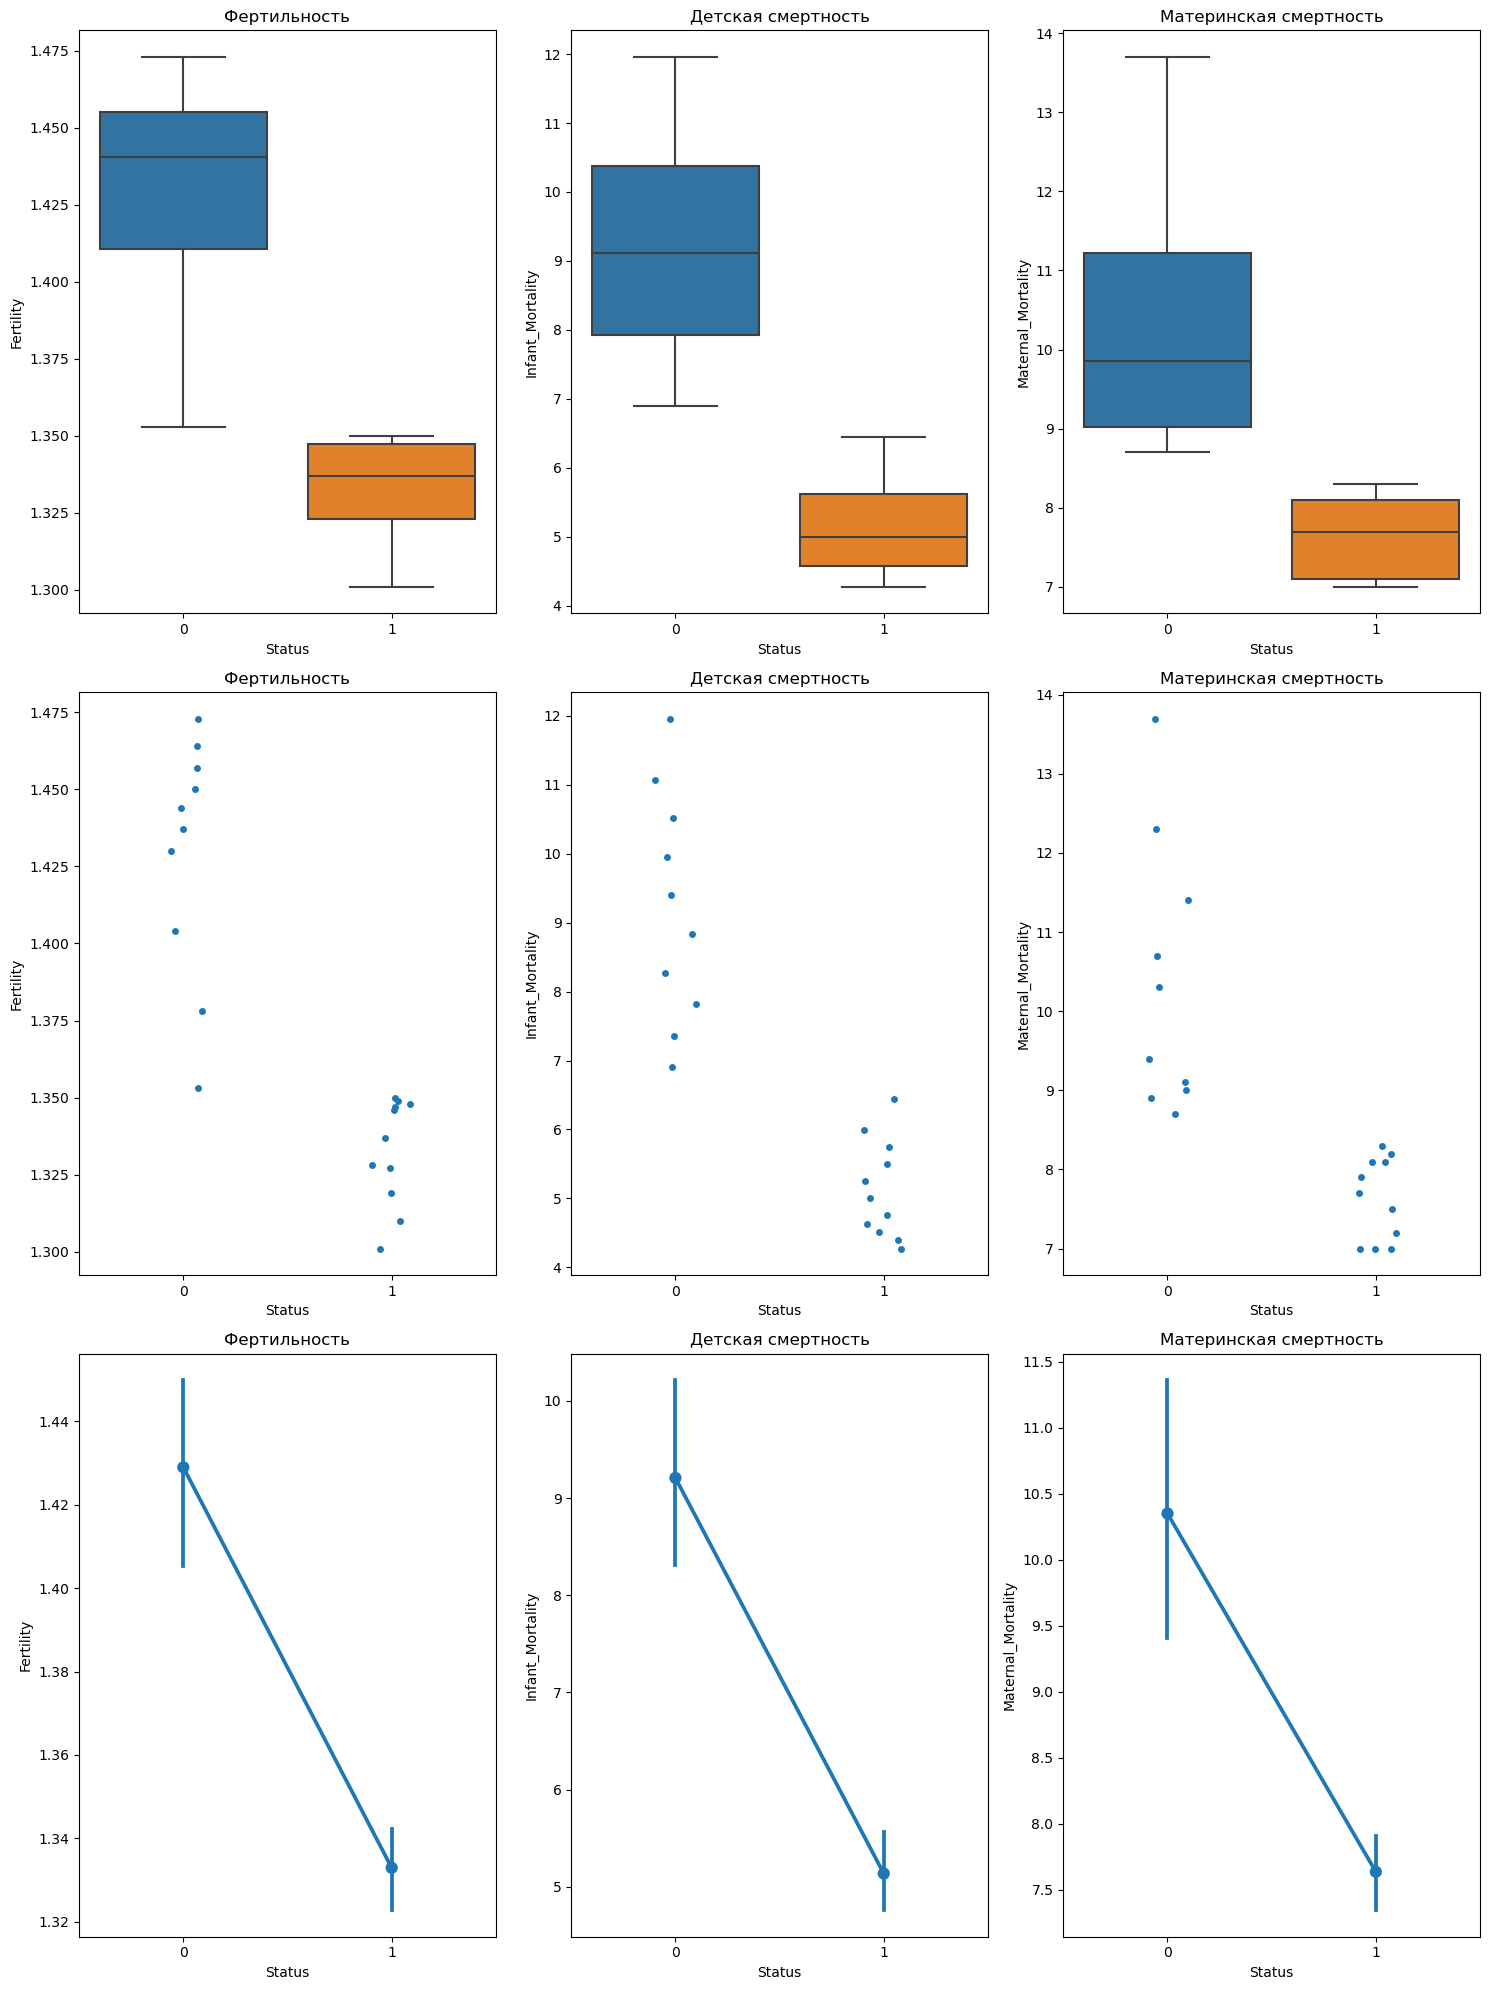

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 20))

sns.boxplot(x='Status', y='Fertility', data=df_germ, ax=axs[0, 0])
axs[0, 0].set_title('Фертильность')

sns.boxplot(x='Status', y='Infant_Mortality', data=df_germ, ax=axs[0, 1])
axs[0, 1].set_title('Детская смертность')

sns.boxplot(x='Status', y='Maternal_Mortality', data=df_germ, ax=axs[0, 2])
axs[0, 2].set_title('Материнская смертность')

sns.stripplot(x='Status', y='Fertility', data=df_germ, jitter=True, ax=axs[1, 0])
axs[1, 0].set_title('Фертильность')

sns.stripplot(x='Status', y='Infant_Mortality', data=df_germ, jitter=True, ax=axs[1, 1])
axs[1, 1].set_title('Детская смертность')

sns.stripplot(x='Status', y='Maternal_Mortality', data=df_germ, jitter=True, ax=axs[1, 2])
axs[1, 2].set_title('Материнская смертность')

sns.pointplot(x='Status', y='Fertility', data=df_germ, ax=axs[2, 0])
axs[2, 0].set_title('Фертильность')

sns.pointplot(x='Status', y='Infant_Mortality', data=df_germ, ax=axs[2, 1])
axs[2, 1].set_title('Детская смертность')

sns.pointplot(x='Status', y='Maternal_Mortality', data=df_germ, ax=axs[2, 2])
axs[2, 2].set_title('Материнская смертность')

plt.tight_layout()
plt.show()

## Вывод

Исходя из предоставленных данных на графиках, можно сделать вывод, что в Германии наблюдается отрицательная корреляция между уровнем абортов
и показателями фертильности, детской смертности и материнской смертности. Это означает, что с уменьшением числа абортов
связано увеличение уровня фертильности и снижение уровней детской и материнской смертности.

Эти данные могут отражать эффективность политики здравоохранения и социальных программ в Германии, направленных на снижение
числа абортов и улучшение условий для материнства и детства, что в свою очередь способствует улучшению показателей
фертильности и снижению смертности среди матерей и детей.

# Швейцария

## Корреляция

In [ ]:
fert_corr_swi = pointbiserialr(df_swi['Status'], df_swi['Fertility'])
print(f"Корреляция между абортами и фертильностью: {fert_corr_swi[0]}")
inf_mort_swi = pointbiserialr(df_swi['Status'], df_swi['Infant_Mortality'])
print(f"Корреляция между абортами и детской смертностью: {inf_mort_swi[0]}")
mat_mort_swi = pointbiserialr(df_swi['Status'], df_swi['Maternal_Mortality'])
print(f"Корреляция между абортами и материнской смертностью: {mat_mort_swi[0]}")

Корреляция между абортами и фертильностью: -0.4912673721480529
Корреляция между абортами и детской смертностью: -0.7623757682206718
Корреляция между абортами и материнской смертностью: -0.6242400575065248


## Графики

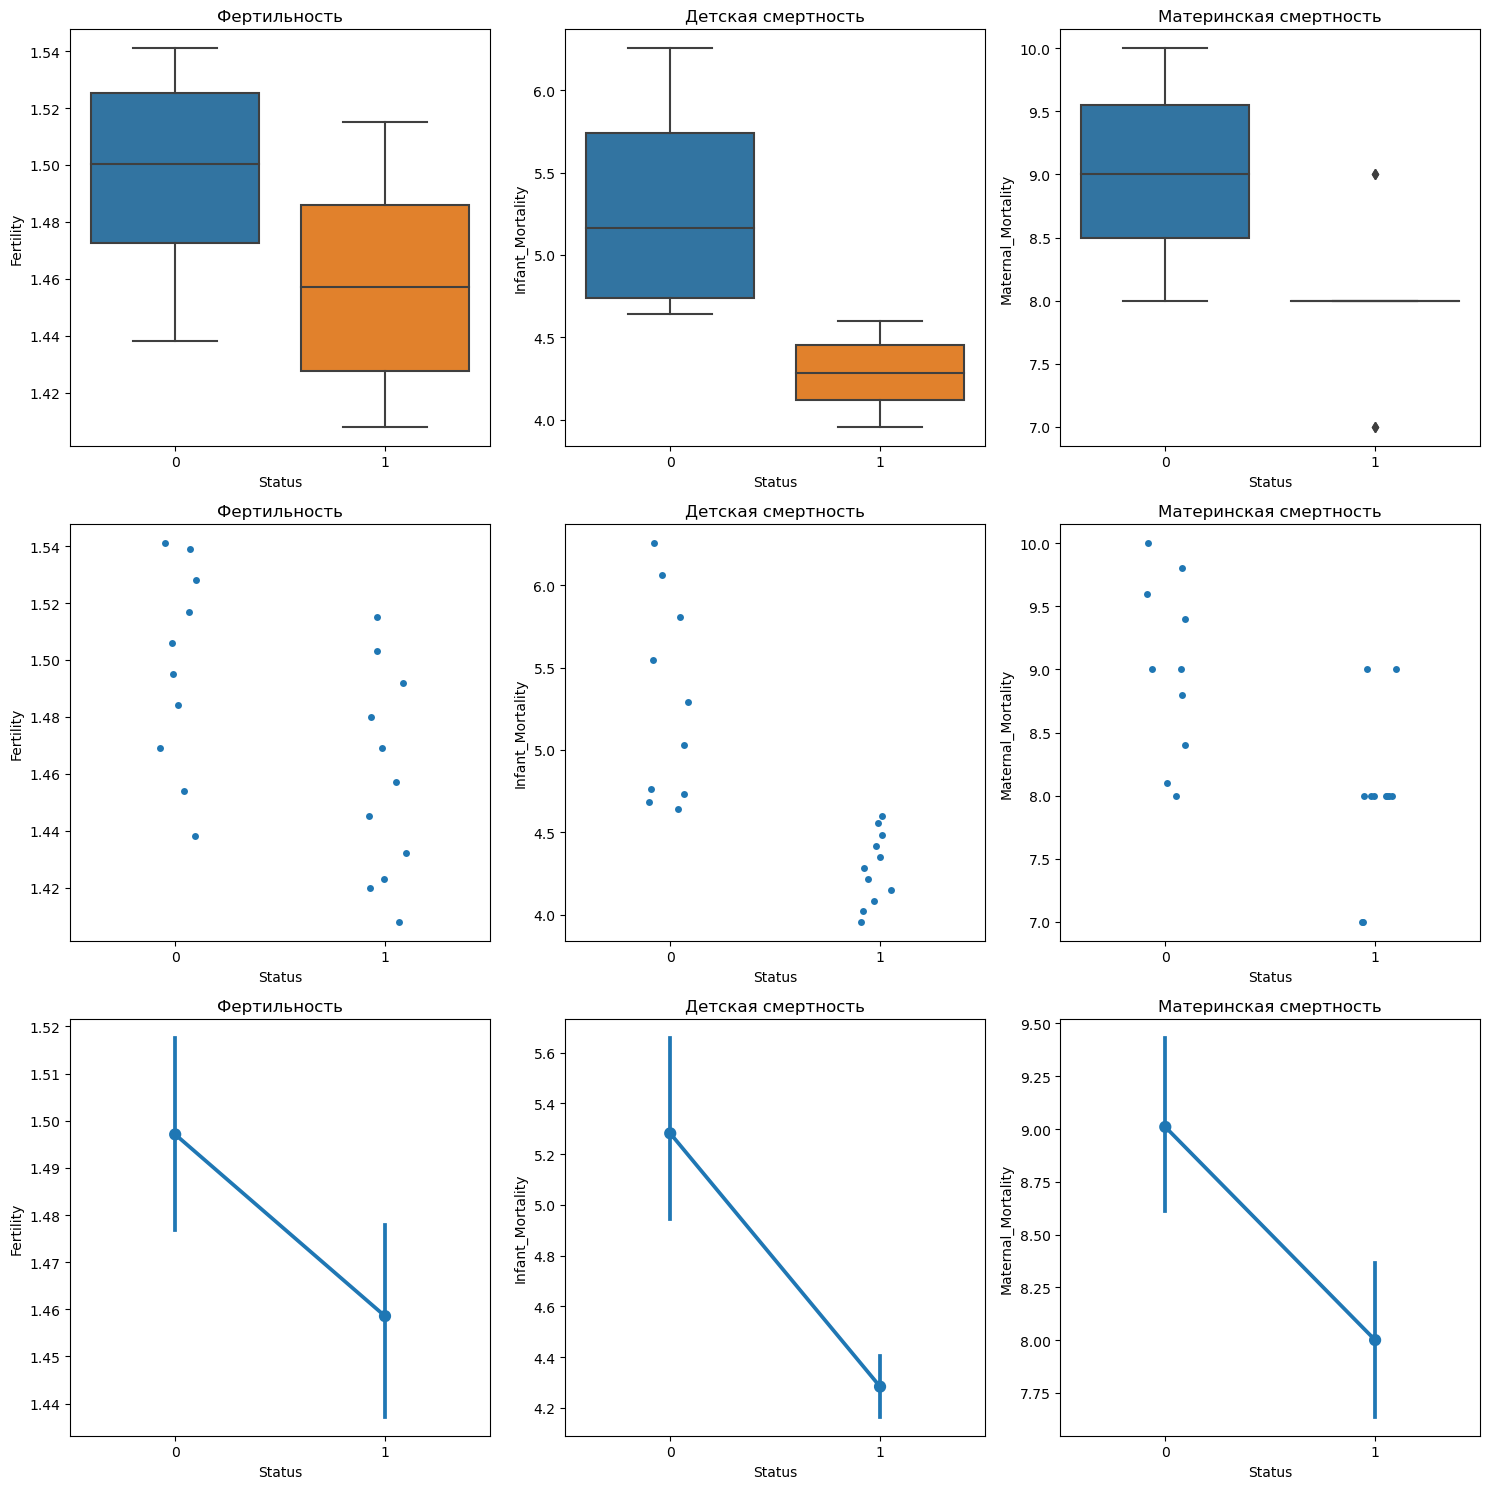

In [ ]:
# Создаем фигуру и оси для 4 графиков
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Диаграмма рассеяния
sns.boxplot(x='Status', y='Fertility', data=df_swi, ax=axs[0, 0])
axs[0, 0].set_title('Фертильность')

# Диаграмма рассеяния
sns.boxplot(x='Status', y='Infant_Mortality', data=df_swi, ax=axs[0, 1])
axs[0, 1].set_title('Детская смертность')

sns.boxplot(x='Status', y='Maternal_Mortality', data=df_swi, ax=axs[0, 2])
axs[0, 2].set_title('Материнская смертность')

sns.stripplot(x='Status', y='Fertility', data=df_swi, jitter=True, ax=axs[1, 0])
axs[1, 0].set_title('Фертильность')

sns.stripplot(x='Status', y='Infant_Mortality', data=df_swi, jitter=True, ax=axs[1, 1])
axs[1, 1].set_title('Детская смертность')

sns.stripplot(x='Status', y='Maternal_Mortality', data=df_swi, jitter=True, ax=axs[1, 2])
axs[1, 2].set_title('Материнская смертность')

sns.pointplot(x='Status', y='Fertility', data=df_swi, ax=axs[2, 0])
axs[2, 0].set_title('Фертильность')

sns.pointplot(x='Status', y='Infant_Mortality', data=df_swi, ax=axs[2, 1])
axs[2, 1].set_title('Детская смертность')

sns.pointplot(x='Status', y='Maternal_Mortality', data=df_swi, ax=axs[2, 2])
axs[2, 2].set_title('Материнская смертность')



plt.tight_layout()
plt.show()

## Выводы

В Швейцарии наблюдается умеренная отрицательная корреляция между абортами и фертильностью (-0.4912673721480529), а также
более сильная отрицательная связь между абортами и детской (-0.7623757682206718) и материнской смертностью (-0.6242400575065248).
Это может указывать на то, что с уменьшением числа абортов связано снижение указанных показателей смертности и фертильности,
что мы и можем заметить на графиках выше, возможно,  это отражает эффективность системы здравоохранения в области
репродуктивного здоровья.

# Турция

## Корреляция

In [ ]:
fert_corr_turk = pointbiserialr(df_turk['Status'], df_turk['Fertility'])
print(f"Корреляция между абортами и фертильностью: {fert_corr_turk[0]}")
inf_mort_turk = pointbiserialr(df_turk['Status'], df_turk['Infant_Mortality'])
print(f"Корреляция между абортами и детской смертностью: {inf_mort_turk[0]}")
mat_mort_turk = pointbiserialr(df_turk['Status'], df_turk['Maternal_Mortality'])
print(f"Корреляция между абортами и детской смертностью: {mat_mort_turk[0]}")

Корреляция между абортами и фертильностью: -0.8691809504829529
Корреляция между абортами и детской смертностью: -0.8747085319593277
Корреляция между абортами и детской смертностью: -0.8631574831285602


## Графики

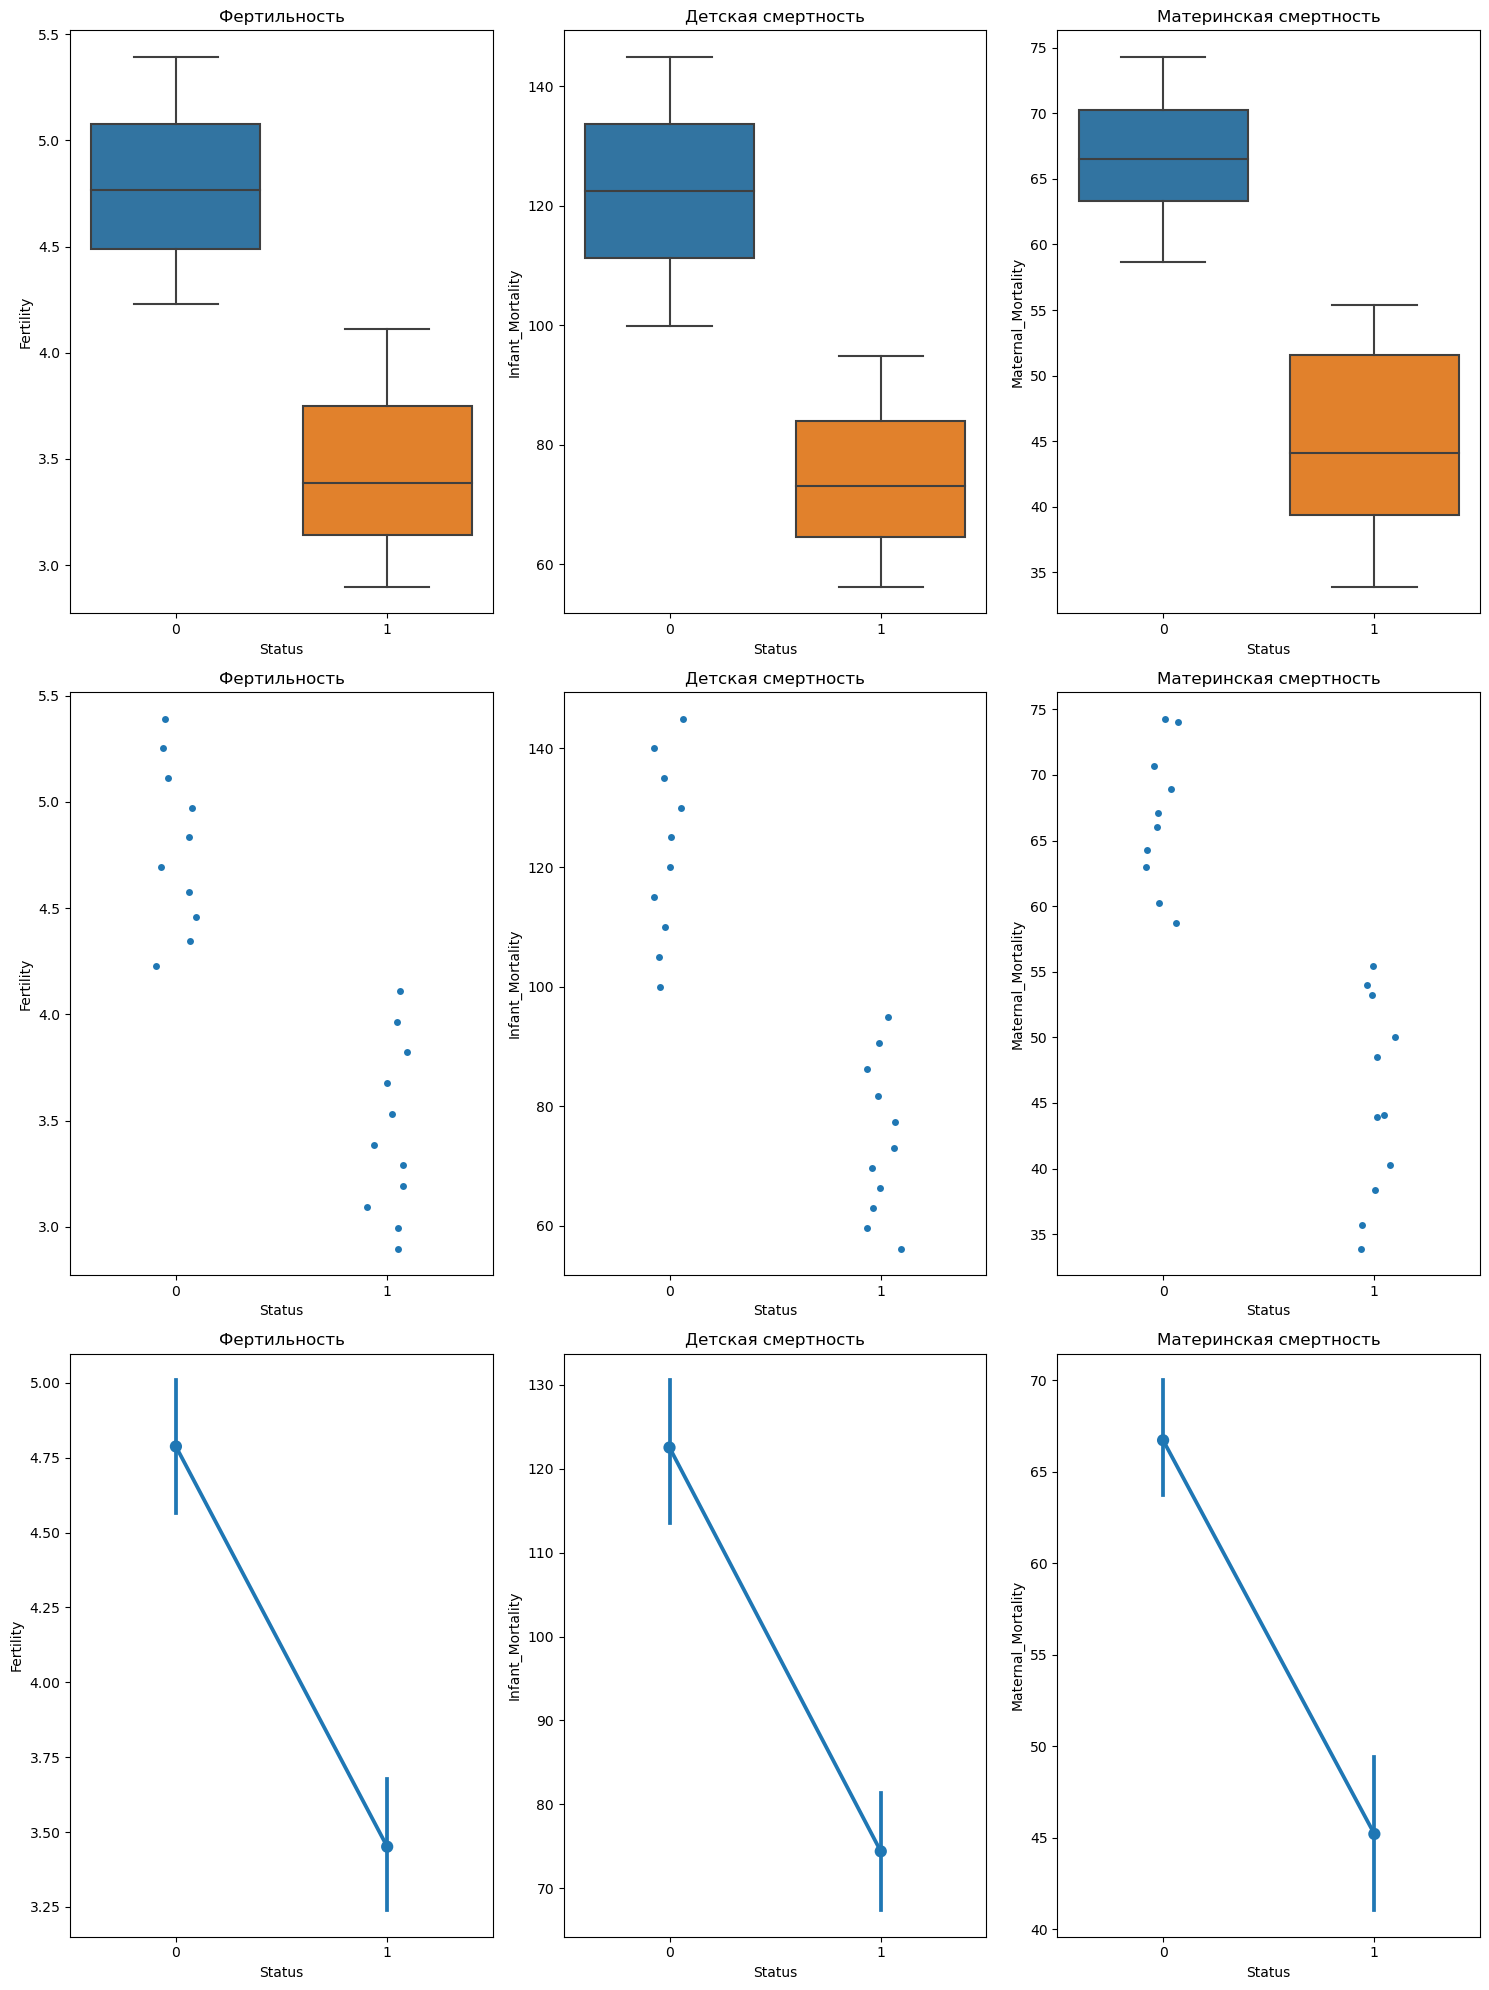

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 20))

sns.boxplot(x='Status', y='Fertility', data=df_turk, ax=axs[0, 0])
axs[0, 0].set_title('Фертильность')

sns.boxplot(x='Status', y='Infant_Mortality', data=df_turk, ax=axs[0, 1])
axs[0, 1].set_title('Детская смертность')

sns.boxplot(x='Status', y='Maternal_Mortality', data=df_turk, ax=axs[0, 2])
axs[0, 2].set_title('Материнская смертность')

sns.stripplot(x='Status', y='Fertility', data=df_turk, jitter=True, ax=axs[1, 0])
axs[1, 0].set_title('Фертильность')

sns.stripplot(x='Status', y='Infant_Mortality', data=df_turk, jitter=True, ax=axs[1, 1])
axs[1, 1].set_title('Детская смертность')

sns.stripplot(x='Status', y='Maternal_Mortality', data=df_turk, jitter=True, ax=axs[1, 2])
axs[1, 2].set_title('Материнская смертность')

sns.pointplot(x='Status', y='Fertility', data=df_turk, ax=axs[2, 0])
axs[2, 0].set_title('Фертильность')

sns.pointplot(x='Status', y='Infant_Mortality', data=df_turk, ax=axs[2, 1])
axs[2, 1].set_title('Детская смертность')

sns.pointplot(x='Status', y='Maternal_Mortality', data=df_turk, ax=axs[2, 2])
axs[2, 2].set_title('Материнская смертность')

plt.tight_layout()
plt.show()

## Выводы

Из предоставленных данных и графиков следует, что в Турции наблюдается сильная отрицательная корреляция между уровнем абортов
и показателями фертильности и детской смертности.Эти данные могут указывать на то, что улучшение доступа к средствам
контрацепции, повышение осведомленности о репродуктивном здоровье и улучшение качества медицинского обслуживания беременных
женщин и детей в Турции могли привести к снижению числа абортов и, как следствие, к улучшению показателей фертильности и
снижению детской смертности. Эти выводы подчеркивают важность комплексного подхода к репродуктивному здоровью и необходимость
поддержки программ, направленных на улучшение здоровья матерей и детей.

# Россия

## Корреляция

In [ ]:
fert_corr_russ = pointbiserialr(df_russ['Status'], df_russ['Fertility'])
print(f"Корреляция между абортами и фертильностью: {fert_corr_russ[0]}")
inf_mort_russ = pointbiserialr(df_russ['Status'], df_russ['Infant_Mortality'])
print(f"Корреляция между абортами и детской смертностью: {inf_mort_russ[0]}")
mat_mort_russ = pointbiserialr(df_russ['Status'], df_russ['Maternal_Mortality'])
print(f"Корреляция между абортами и детской смертностью: {mat_mort_russ[0]}")

Корреляция между абортами и фертильностью: -0.6816130157186117
Корреляция между абортами и детской смертностью: -0.9158294311860523
Корреляция между абортами и детской смертностью: -0.8321412078016168


## Графики

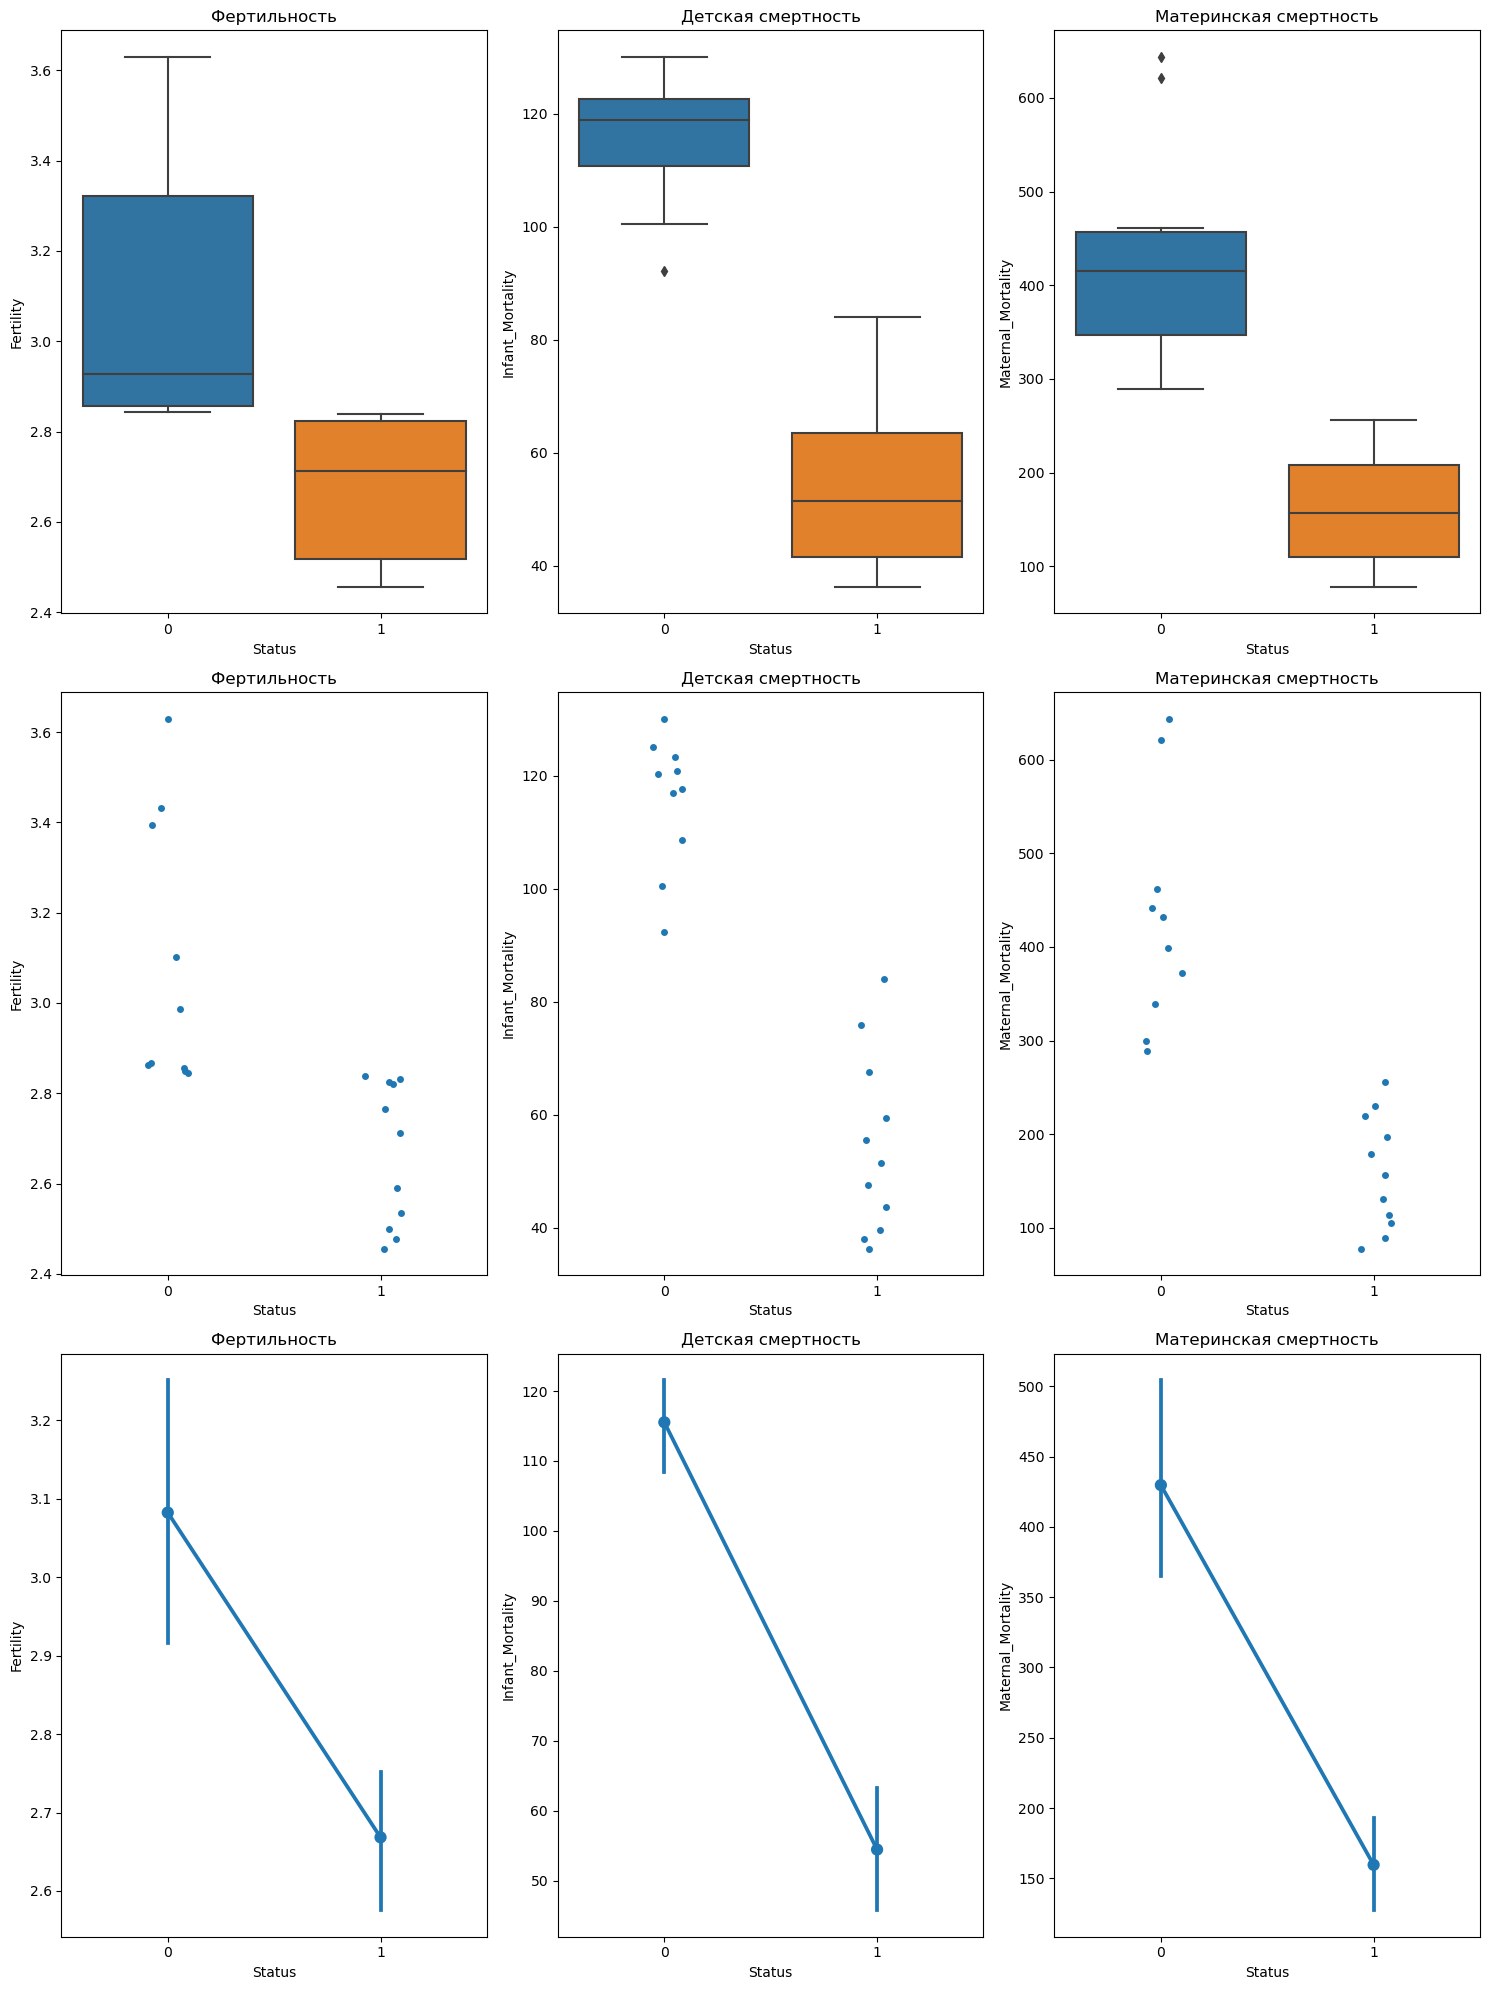

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 20))

sns.boxplot(x='Status', y='Fertility', data=df_russ, ax=axs[0, 0])
axs[0, 0].set_title('Фертильность')

sns.boxplot(x='Status', y='Infant_Mortality', data=df_russ, ax=axs[0, 1])
axs[0, 1].set_title('Детская смертность')

sns.boxplot(x='Status', y='Maternal_Mortality', data=df_russ, ax=axs[0, 2])
axs[0, 2].set_title('Материнская смертность')

sns.stripplot(x='Status', y='Fertility', data=df_russ, jitter=True, ax=axs[1, 0])
axs[1, 0].set_title('Фертильность')

sns.stripplot(x='Status', y='Infant_Mortality', data=df_russ, jitter=True, ax=axs[1, 1])
axs[1, 1].set_title('Детская смертность')

sns.stripplot(x='Status', y='Maternal_Mortality', data=df_russ, jitter=True, ax=axs[1, 2])
axs[1, 2].set_title('Материнская смертность')

sns.pointplot(x='Status', y='Fertility', data=df_russ, ax=axs[2, 0])
axs[2, 0].set_title('Фертильность')

sns.pointplot(x='Status', y='Infant_Mortality', data=df_russ, ax=axs[2, 1])
axs[2, 1].set_title('Детская смертность')

sns.pointplot(x='Status', y='Maternal_Mortality', data=df_russ, ax=axs[2, 2])
axs[2, 2].set_title('Материнская смертность')

plt.tight_layout()
plt.show()

## Выводы

Из предоставленных данных и графиков следует, что в России наблюдается значимая отрицательная корреляция между числом абортов
и показателями фертильности (-0.6816130157186117), а также между абортами и детской смертностью (-0.9158294311860523).
Это указывает на то, что снижение числа абортов сопровождается увеличением фертильности и снижением детской смертности,
что может быть связано с улучшением качества медицинской помощи и доступности методов контрацепции. Также отмечается сильная
обратная связь между абортами и материнской смертностью (-0.8321412078016168), подчеркивающая важность профилактических мер и
безопасности процедур прерывания беременности для снижения материнской смертности. Эти данные отражают положительные изменения
в области репродуктивного здоровья в России.

# Преступность

# Датафреймы

## Германия

In [ ]:
df_germ_crime = pd.read_csv("germany_crime.csv")
df_germ_crime

,Year,Status,Crime_Rate
0,1982,0,3.98
1,1983,0,4.43
2,1984,0,3.92
3,1985,0,4.12
4,1986,0,3.78
5,1987,0,3.42
6,1988,0,2.73
7,1989,0,1.89
8,1990,0,1.50
9,1991,0,1.41


In [ ]:
crime_germ = pointbiserialr(df_germ_crime['Status'], df_germ_crime['Crime_Rate'])
print(f"Корреляция между абортами и преступностью: {crime_germ[0]}")

Корреляция между абортами и преступностью: -0.7154766249160575


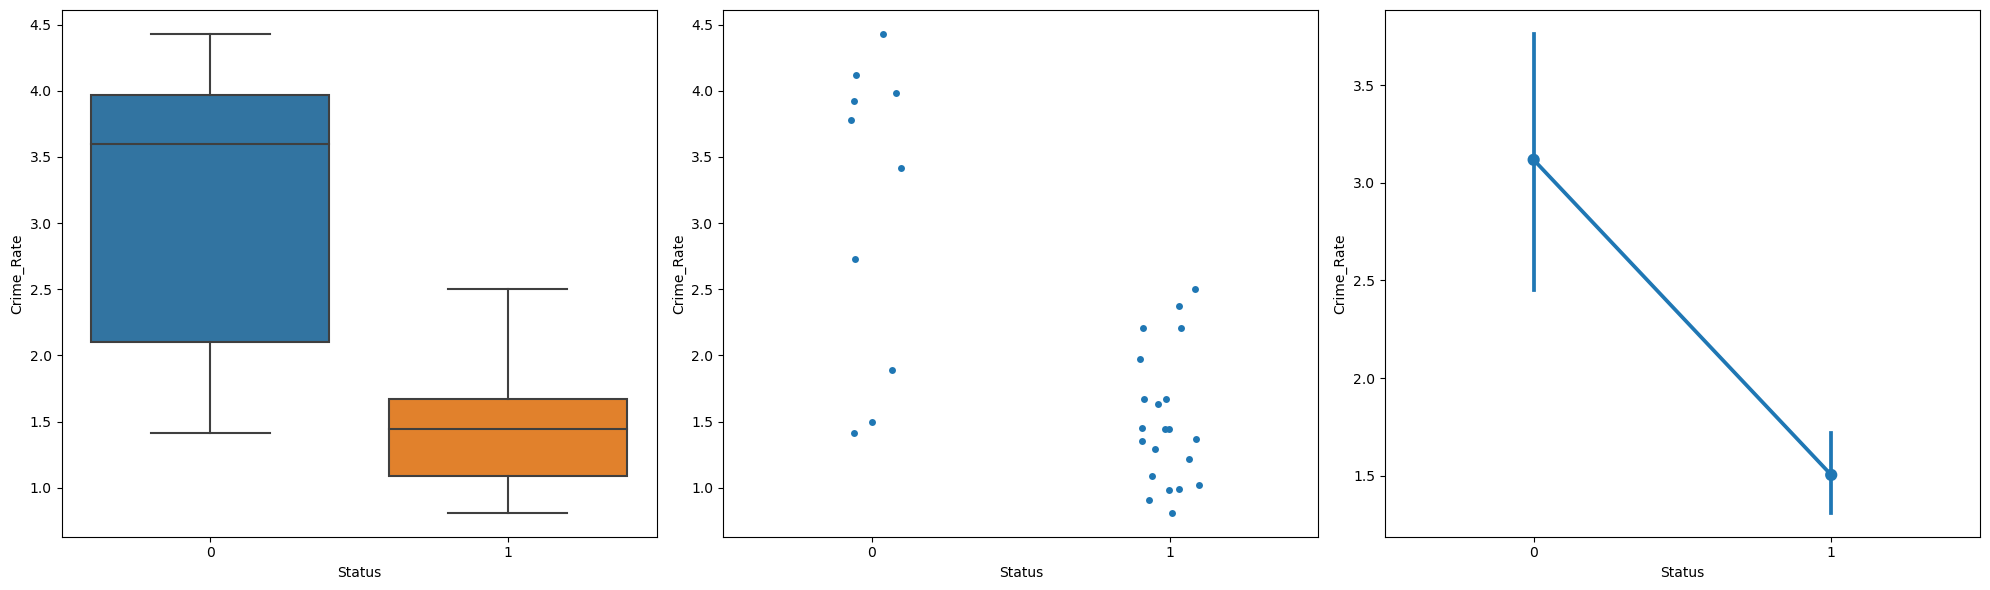

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Status', y='Crime_Rate', data=df_germ_crime, ax=axs[0])

sns.stripplot(x='Status', y='Crime_Rate', data=df_germ_crime, jitter=True, ax=axs[1])

sns.pointplot(x='Status', y='Crime_Rate', data=df_germ_crime, ax=axs[2])

plt.tight_layout()
plt.show()

## Швейцария

In [ ]:
df_swi_crime = pd.read_csv("switzerland_crime.csv")
df_swi_crime

,Year,Status,Crime_Rate
0,1990,0,1.84
1,1991,0,1.64
2,1992,0,1.45
3,1993,0,1.39
4,1994,0,1.37
5,1995,0,1.29
6,1996,0,1.28
7,1997,0,1.23
8,1998,0,1.07
9,1999,0,1.25


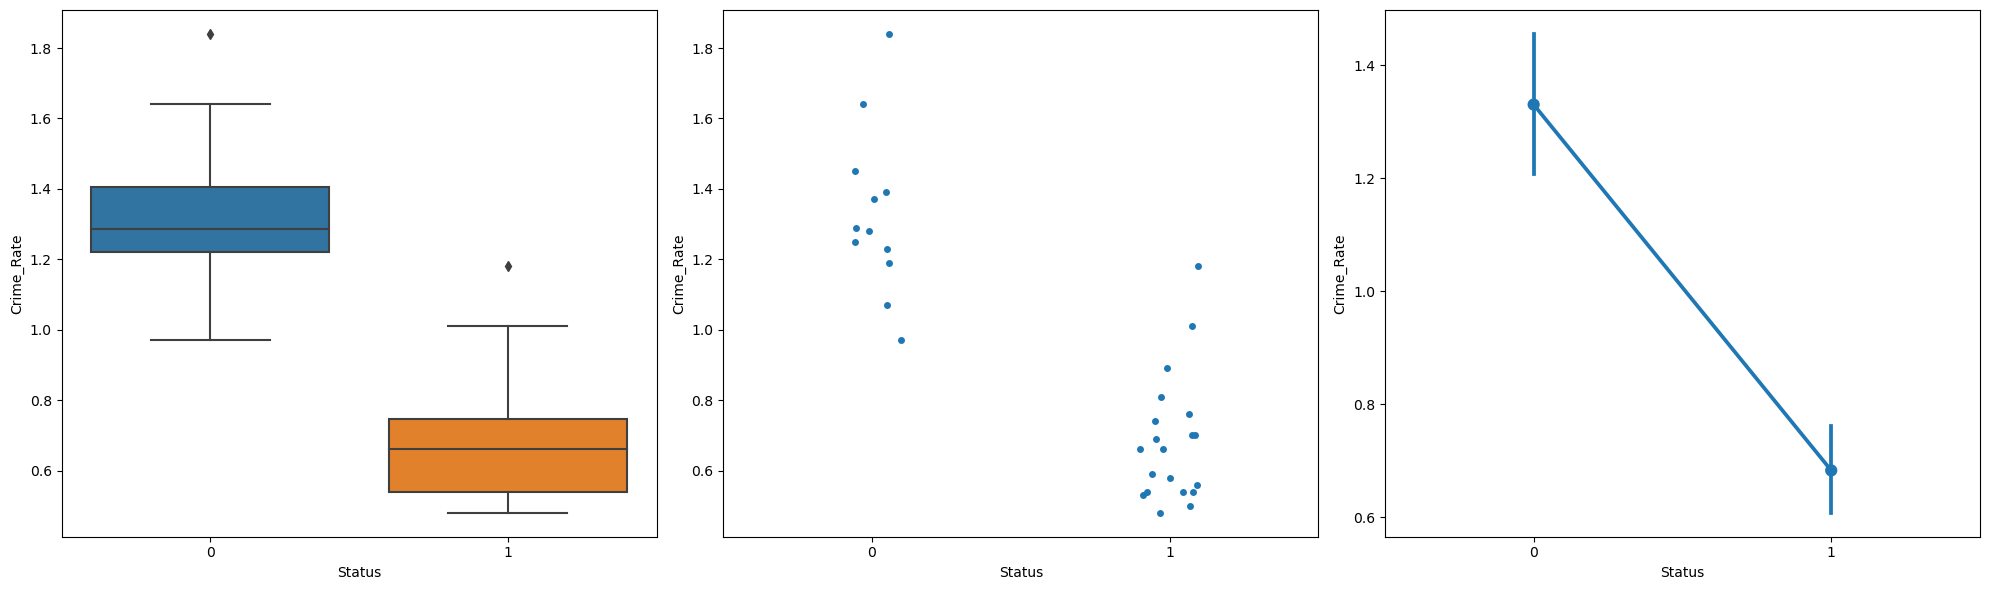

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Status', y='Crime_Rate', data=df_swi_crime, ax=axs[0])

sns.stripplot(x='Status', y='Crime_Rate', data=df_swi_crime, jitter=True, ax=axs[1])

sns.pointplot(x='Status', y='Crime_Rate', data=df_swi_crime, ax=axs[2])

plt.tight_layout()
plt.show()

In [ ]:
crime_swi = pointbiserialr(df_swi_crime['Status'], df_swi_crime['Crime_Rate'])
print(f"Корреляция между абортами и преступностью: {crime_swi[0]}")

Корреляция между абортами и преступностью: -0.8478862632507888


## Турция

In [ ]:
df_turk_crime = pd.read_csv("turkey_crime.csv")
df_turk_crime

,Year,Status,Crime_Rate
0,1973,0,4.71
1,1974,0,4.56
2,1975,0,4.76
3,1976,0,4.12
4,1977,0,4.42
5,1978,0,4.48
6,1979,0,4.28
7,1980,0,4.12
8,1981,0,3.87
9,1982,1,4.01


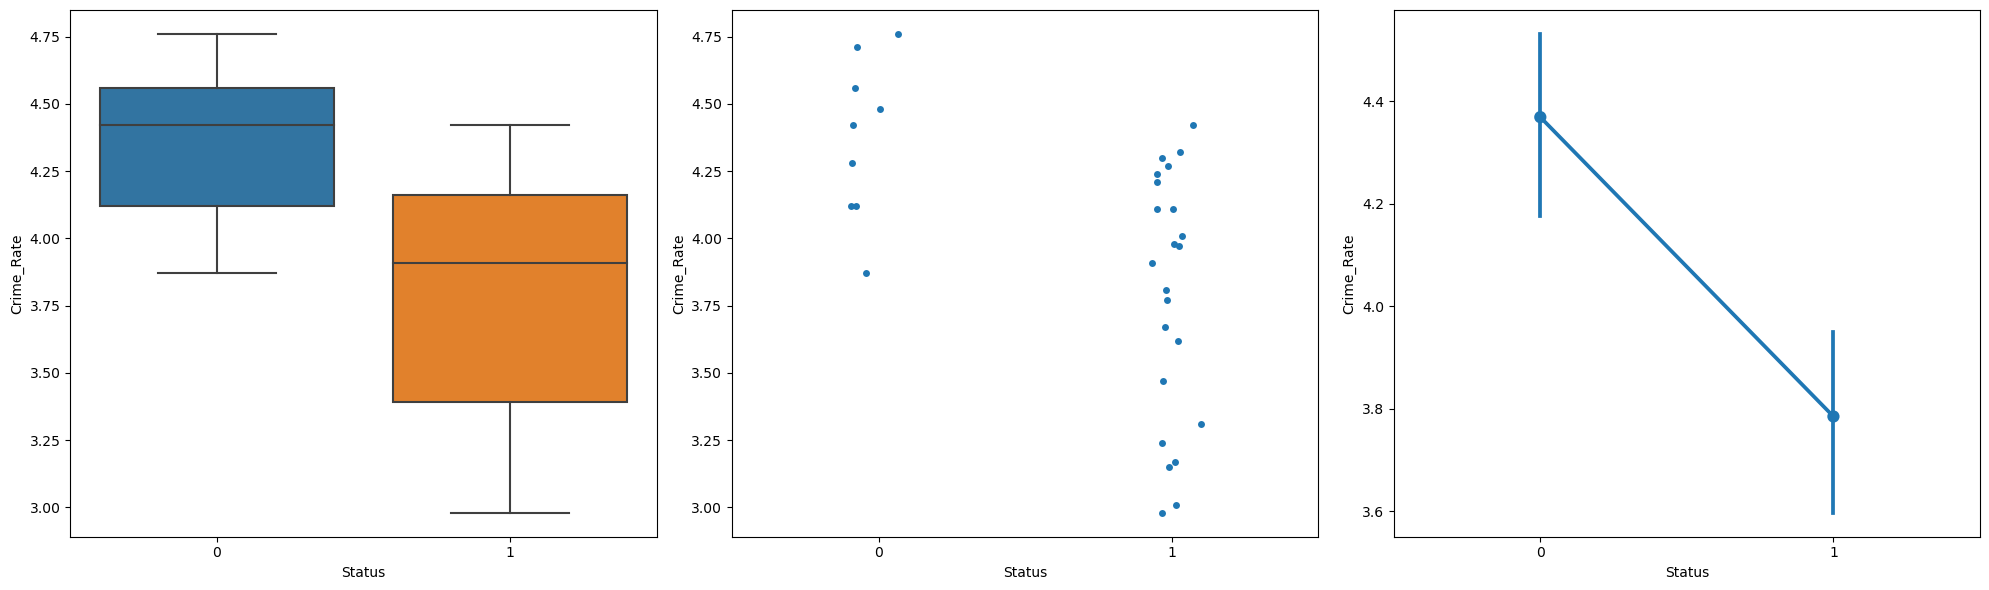

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Status', y='Crime_Rate', data=df_turk_crime, ax=axs[0])

sns.stripplot(x='Status', y='Crime_Rate', data=df_turk_crime, jitter=True, ax=axs[1])

sns.pointplot(x='Status', y='Crime_Rate', data=df_turk_crime, ax=axs[2])

plt.tight_layout()
plt.show()

In [ ]:
crime_turk = pointbiserialr(df_turk_crime['Status'], df_turk_crime['Crime_Rate'])
print(f"Корреляция между абортами и преступностью: {crime_turk[0]}")

Корреляция между абортами и преступностью: -0.541416313891458


## Россия

Показатели преступности в Росссии отсматривать нецелесообразно, т.к. аборты были легализованы в 1955 году, т.е. в послевоенный период. Преступность в это время объяснялась очень большим количеством факторов, несвязанных с абортами

# Выводы по преступности

В двух из трёх представленных стран (Германия и Швейцария) наблюдается сильная отрицательная корреляция между статусом легализации и преступностью. Это же подтверждают и представленные графики. Наиболее ярко разница отражена на boxplot. Несмотря на это, в Турции корреляция является средней, что говорит о том, что прочие социальные факторы, оказывают наибольшее воздействие на показатели преступности. Цифры в основном держатся в одной и той же зоне и лишь немного снижаются с течением времени, что в целом является адекватным. Особенно неоднозначность проявляется на 2 представленном графике.

Можно сделать вывод о том, что аборты определённо оказывают влияние на падение преступности, но также важно и учитывать влияние прочих факторов.